In [209]:
# is this the folder with the script in it?
scriptDir<-getwd()
scriptDir

# if not, uncomment and use this instead
# scriptDir<-""

[1] "/Users/anyaemerson/Documents/RRIV/SensorDataProcessing/rriv_methane"

In [306]:
methaneFunctions<-paste(scriptDir,"/methane_functions.r",sep="")
methaneFunctions
if (file.exists(methaneFunctions)){
    source(methaneFunctions)
} else {
    print("manually correct the location and/or name of methane_functions.r")
}

[1] "/Users/anyaemerson/Documents/RRIV/SensorDataProcessing/rriv_methane/methane_functions.r"

# 0. Load packages used

In [299]:
# Package names
packages <- c("tidyverse","dplyr", "doBy", "lubridate", "ggplot2", "Hmisc", "zoo", "viridis", "gam", "ggeffects", "reshape2", "mgcv")
packageHandler(packages)

also installing the dependencies ‘bit’, ‘rematch’, ‘bit64’, ‘blob’, ‘DBI’, ‘gargle’, ‘cellranger’, ‘ids’, ‘vroom’, ‘tzdb’, ‘progress’, ‘selectr’, ‘conflicted’, ‘dbplyr’, ‘dtplyr’, ‘forcats’, ‘googledrive’, ‘googlesheets4’, ‘haven’, ‘hms’, ‘modelr’, ‘readr’, ‘readxl’, ‘reprex’, ‘rvest’





The downloaded binary packages are in
	/var/folders/c7/zg7bjws11qn4p6rmz9f1zwqc0000gn/T//Rtmpl6sZFi/downloaded_packages


── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ forcats 1.0.0     ✔ stringr 1.5.0
✔ purrr   1.0.1     ✔ tibble  3.2.1
✔ readr   2.1.4     ✔ tidyr   1.3.0
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ purrr::accumulate() masks foreach::accumulate()
✖ nlme::collapse()    masks dplyr::collapse()
✖ dplyr::filter()     masks stats::filter()
✖ dplyr::lag()        masks stats::lag()
✖ doBy::order_by()    masks dplyr::order_by()
✖ Hmisc::src()        masks dplyr::src()
✖ Hmisc::summarize()  masks dplyr::summarize()
✖ purrr::when()       masks foreach::when()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


In [309]:
directory0<-"~/Library/Mobile\ Documents/com~apple~CloudDocs/Documents/RRIV/Data/test/20230621-pdock"
directory1<-"~/Library/Mobile\ Documents/com~apple~CloudDocs/Documents/RRIV/Data/test/20230621-pdock/RRIV"
directory2<-"~/Library/Mobile\ Documents/com~apple~CloudDocs/Documents/RRIV/Data/test/20230621-pdock/temp"
directory3<-"~/Library/Mobile\ Documents/com~apple~CloudDocs/Documents/RRIV/Data/test/20230621-pdock/LGR"

In [304]:
# create output directory path based on input directory
outputDir<-"~/Library/Mobile\ Documents/com~apple~CloudDocs/Documents/RRIV/Data/test/20230621-pdock/output"
# create the output directory if necessary
newDir(dirPath = outputDir)

Output directory, ~/Library/Mobile Documents/com~apple~CloudDocs/Documents/RRIV/Data/test/20230621-pdock/output, already exists


In [275]:

savePlot<-function(plot, tag="",width=800,height=800,od=outputDir){
    if(substr(od, nchar(od), nchar(od)) != "/"){ od<-paste0(od,"/") }
        pngPath = paste0(od, deparse(substitute(plot)), tag,"_", ".png")
        png(file = pngPath, width=width, height=height)
        print(plot)
        dev.off()
}
savePlot<-function(plot, tag="",width=800,height=800,od=outputDir){

savePlot<-function(plot, tag="",width=800,height=800,od=outputDir){
    if(substr(od, nchar(od), nchar(od)) != "/"){ od<-paste0(od,"/") }
        pngPath = paste0(od, deparse(substitute(plot)), tag,"_", ".png")
        png(file = pngPath, width=width, height=height)
        print(plot)
        dev.off()
}
    if(substr(od, nchar(od), nchar(od)) != "/"){ od<-paste0(od,"/") }
        pngPath = paste0(od, deparse(substitute(plot)), tag,"_", ".png")
        png(file = pngPath, width=width, height=height)
        print(plot)
        dev.off()
}

In [10]:
# cal_list<-c(
#     "cal1",
#     "cal2",
#     "cal3",
#     "cal4",
#     "cal5")

# 3. Read in data from both RRIV and LGR
note: can separate paths for LGR and RRIV if you want, but concat_dirs should work anyways making use of the filePattern argument

In [315]:
# if(!file.exists("~/Library/Mobile\ Documents/com~apple~CloudDocs/Documents/RRIV/Data/test/20230621-pdock/output/rriv_data.csv")){
    #rriv df
    rriv_data<-concat_dirs(directory1, read_rriv_CSV, filePattern=".CSV", minFileSize=400)
    rriv_data<-process_rriv_columns(rriv_data)
# rriv_data
# had to manually remove NA row 
    #add col for co2
#     rriv_data['co2_ppm']<-NA
#     rriv_data$co2_ppm<-NA

    #cal3 df
#     rriv_cal3<-concat_dirs(directory2, read_rriv_CSV, filePattern=".CSV", minFileSize=400)
#     rriv_cal3<-process_rriv_columns(rriv_cal3)

    #combine
#     rriv_data<-rbind(rriv_data,rriv_cal3)
#     rriv_data<-rbind(rriv_cal3,rriv_data[, 16:17])

    
    UUIDdict=c(
    "57FF6E068387575148360767"="CAL1",
    "57FF6D068387575151290167"="CAL2",
    "57FF6F068387575149330867"="CAL3",
    "57FF6E068387575140070767"="CAL4",
    "50FF74068678545256252467"="CAL5")
    rriv_data<-createSensorColFromIDs(rriv_data,idCol = "uuid",dict = UUIDdict)

    
    saveDFcsv(rriv_data)
# }
rriv_data

Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Warning message:
“One or more parsing issues, call `problems()` on your data frame for details,
e.g.:
  dat <- vroom(...)
  problems(dat)”
Warning message:
“One or mo

[1] "Dataframe generated, manually process column types if necessary"


Warning message in process_rriv_columns(rriv_data):
“NAs introduced by coercion”
Warning message:
“Unknown or uninitialised column: `Sensor`.”


[1] "~/Library/Mobile Documents/com~apple~CloudDocs/Documents/RRIV/Data/test/20230621-pdock/output/rriv_data.csv"


type,site,logger,deployment,deployed_at,uuid,time.s,time.h,battery.V,measurementCycle,burstCycle,aht_C,aht_RH,ch4_raw,ch4_cal,user_note,user_value,co2_CO2_ppm,Sensor
<fct>,<fct>,<fct>,<fct>,<int>,<fct>,<dbl>,<dttm>,<dbl>,<dbl>,<fct>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<chr>
raw,pdock1,CAL1,pdock-rriv-57FF6E068387575148360767-1687285497,1687285497,57FF6E068387575148360767,1687360503,2023-06-21 15:15:03,1106,35849,1,28.960,50.09,398.0,0,NA,NA,NA,CAL1
raw,pdock1,CAL1,pdock-rriv-57FF6E068387575148360767-1687285497,1687285497,57FF6E068387575148360767,1687360506,2023-06-21 15:15:05,1076,35849,1,28.970,50.02,399.0,0,NA,NA,NA,CAL1
raw,pdock1,CAL1,pdock-rriv-57FF6E068387575148360767-1687285497,1687285497,57FF6E068387575148360767,1687360508,2023-06-21 15:15:08,1068,35849,1,28.980,49.93,405.0,0,NA,NA,NA,CAL1
raw,pdock1,CAL1,pdock-rriv-57FF6E068387575148360767-1687285497,1687285497,57FF6E068387575148360767,1687360511,2023-06-21 15:15:10,1069,35849,1,29.010,49.72,410.0,0,NA,NA,NA,CAL1
raw,pdock1,CAL1,pdock-rriv-57FF6E068387575148360767-1687285497,1687285497,57FF6E068387575148360767,1687360513,2023-06-21 15:15:12,1066,35849,1,29.000,49.57,412.0,0,NA,NA,NA,CAL1
raw,pdock1,CAL1,pdock-rriv-57FF6E068387575148360767-1687285497,1687285497,57FF6E068387575148360767,1687360515,2023-06-21 15:15:15,1068,35849,1,29.040,49.33,417.0,0,NA,NA,NA,CAL1
raw,pdock1,CAL1,pdock-rriv-57FF6E068387575148360767-1687285497,1687285497,57FF6E068387575148360767,1687360518,2023-06-21 15:15:17,1071,35849,1,29.060,49.18,421.0,0,NA,NA,NA,CAL1
raw,pdock1,CAL1,pdock-rriv-57FF6E068387575148360767-1687285497,1687285497,57FF6E068387575148360767,1687360520,2023-06-21 15:15:20,1073,35849,1,29.060,49.14,426.0,0,NA,NA,NA,CAL1
raw,pdock1,CAL1,pdock-rriv-57FF6E068387575148360767-1687285497,1687285497,57FF6E068387575148360767,1687360523,2023-06-21 15:15:22,1074,35849,1,29.090,49.19,432.0,0,NA,NA,NA,CAL1


In [ ]:
# rriv_data <- read.csv("~/Library/Mobile\ Documents/com~apple~CloudDocs/Documents/RRIV/Data/test/20230621-pdock/output/rriv_data.csv", header = TRUE, sep = ",")


In [328]:
lgr_data<-concat_dirs(directory3, read_GA_ZIP, filePattern=".zip", minFileSize=300)
    clean_temp()
lgr_data$Time<-lubridate::as_datetime(lgr_data$Time)
saveDFcsv(lgr_data)
# lgr_data

[1] "Dataframe generated, manually process column types if necessary"
[1] "~/Library/Mobile Documents/com~apple~CloudDocs/Documents/RRIV/Data/test/20230621-pdock/output/lgr_data.csv"


In [317]:
# str(rriv_data)
rriv_data$co2_ppm<-as.numeric(rriv_data$co2_CO2_ppm)
str(rriv_data)

tibble [9,717 × 20] (S3: tbl_df/tbl/data.frame)
 $ type            : Factor w/ 2 levels "raw","summary": 1 1 1 1 1 1 1 1 1 1 ...
 $ site            : Factor w/ 5 levels "pdock1","pdock2",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ logger          : Factor w/ 5 levels "CAL1","CAL2",..: 1 1 1 1 1 1 1 1 1 1 ...
 $ deployment      : Factor w/ 6 levels "pdock-deploy-57FF6D068387575151290167-1687285931",..: 4 4 4 4 4 4 4 4 4 4 ...
 $ deployed_at     : int [1:9717] 1687285497 1687285497 1687285497 1687285497 1687285497 1687285497 1687285497 1687285497 1687285497 1687285497 ...
 $ uuid            : Factor w/ 5 levels "50FF74068678545256252467",..: 4 4 4 4 4 4 4 4 4 4 ...
 $ time.s          : num [1:9717] 1.69e+09 1.69e+09 1.69e+09 1.69e+09 1.69e+09 ...
 $ time.h          : POSIXct[1:9717], format: "2023-06-21 15:15:03" "2023-06-21 15:15:05" ...
 $ battery.V       : num [1:9717] 1106 1076 1068 1069 1066 ...
 $ measurementCycle: num [1:9717] 35849 35849 35849 35849 35849 ...
 $ burstCycle      : Factor w/ 60

# RAW PLOTS

Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”


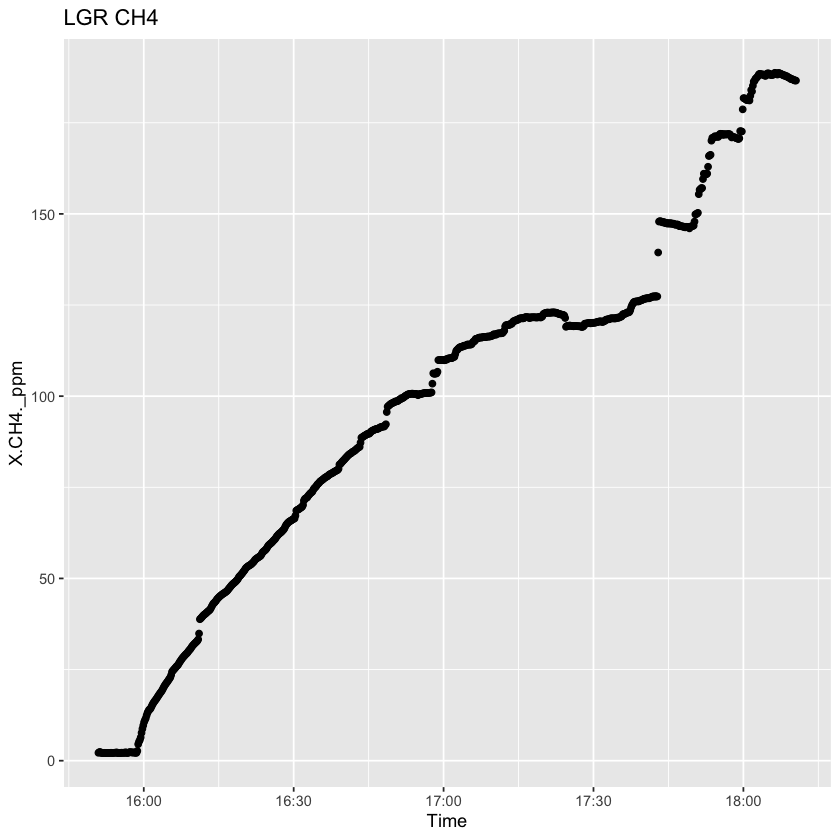

Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”


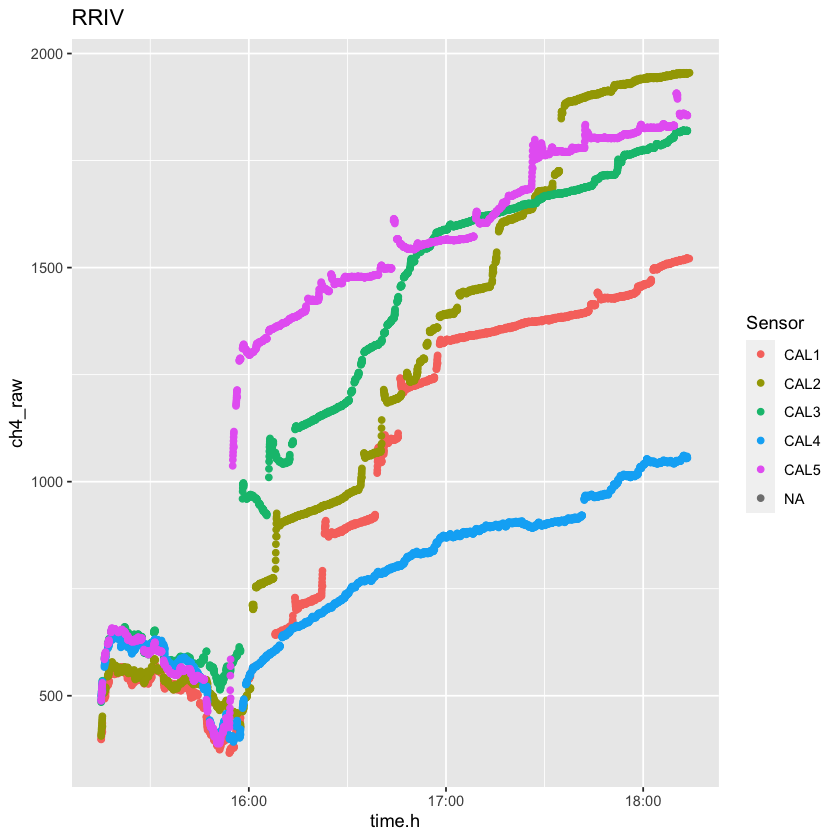

Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”


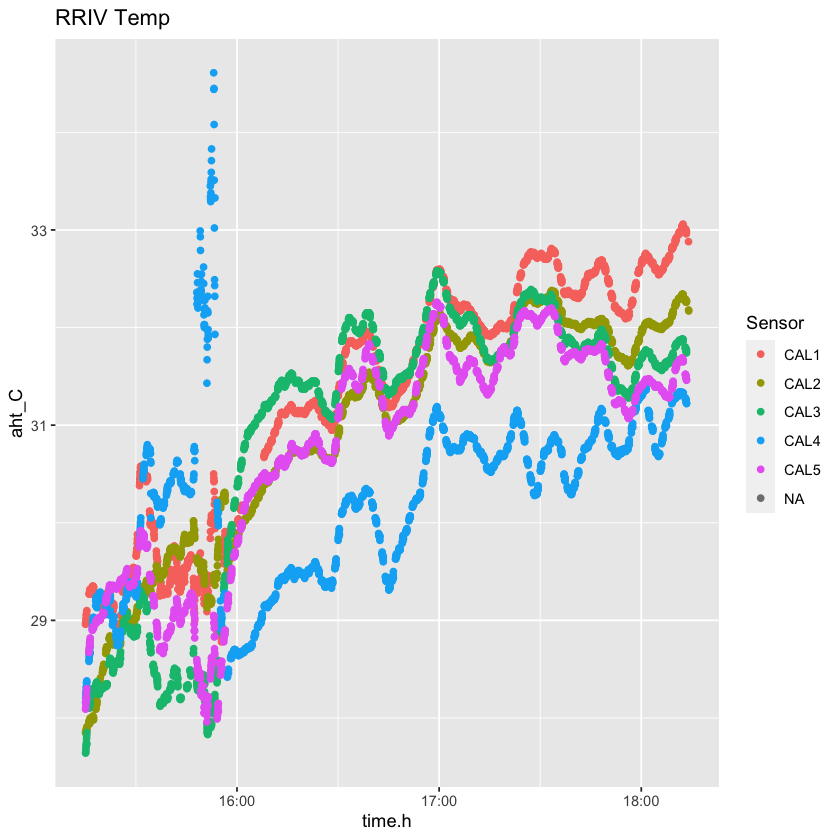

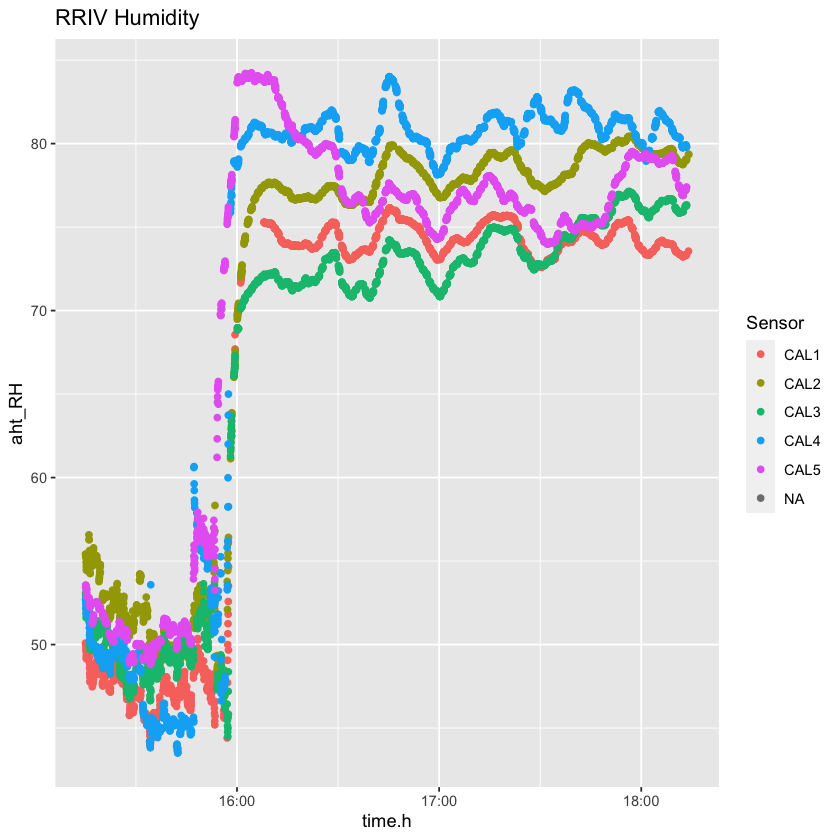

Warning message:
“Removed 7769 rows containing missing values (`geom_point()`).”


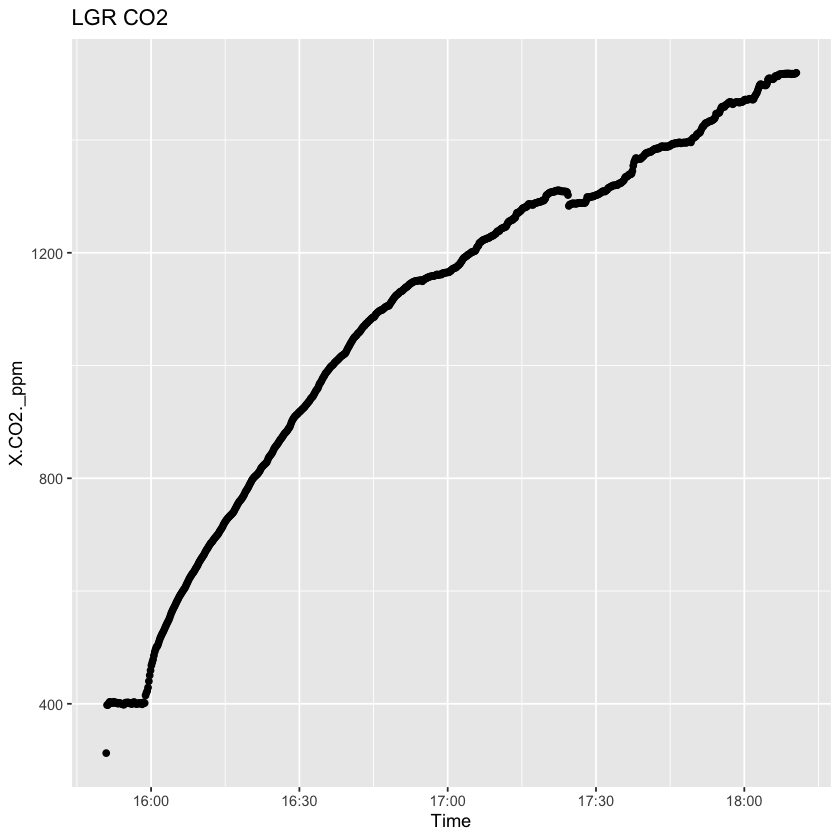

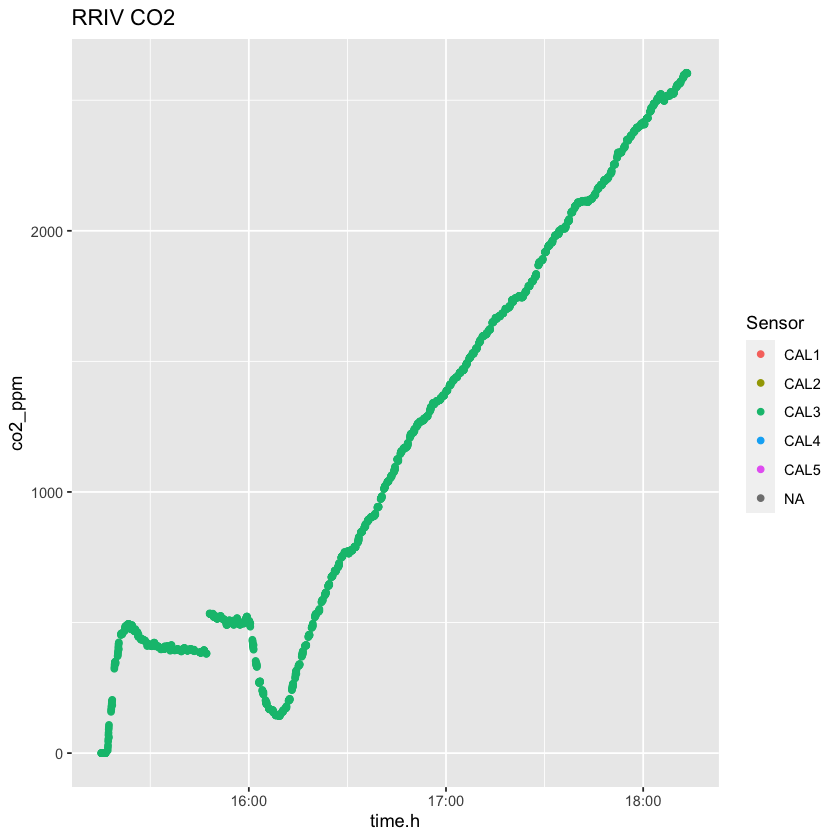

In [320]:
ggplot(lgr_data, aes(x=Time, y=X.CH4._ppm))+geom_point()+labs(title="LGR CH4")
ggplot(rriv_data, aes(x=time.h, y=ch4_raw, color=Sensor))+geom_point()+labs(title="RRIV")
ggplot(rriv_data, aes(x=time.h, y=aht_C, color=Sensor))+geom_point()+labs(title="RRIV Temp")
ggplot(rriv_data, aes(x=time.h, y=aht_RH, color=Sensor))+geom_point()+labs(title="RRIV Humidity")
ggplot(lgr_data, aes(x=Time, y=X.CO2._ppm))+geom_point()+labs(title="LGR CO2")
ggplot(rriv_data, aes(x=time.h, y=co2_ppm, color=Sensor))+geom_point()+labs(title="RRIV CO2")


In [332]:
# str(rriv_data)
# range(rriv_data$time.h,na.rm=TRUE)

[1] "2023-06-21 15:15:03 UTC" "2023-06-21 18:14:05 UTC"

# 4. Align time frames of RRIV & LGR 

In [338]:
# start time is the max between the starting points for each range
start<-max(range(rriv_data$time.h,na.rm=TRUE)[1],range(lgr_data$Time,na.rm=TRUE)[1])
# start
# end time is the min between the ending points for each range
end<-min(range(rriv_data$time.h,na.rm=TRUE)[2],range(lgr_data$Time,na.rm=TRUE)[2])

# subset the rriv data
rriv_data_overlap<-rriv_data[rriv_data$time.h>start & rriv_data$time.h<end,]
range(rriv_data_overlap$time.h,na.rm=TRUE)

# subset the lgr data
lgr_data_overlap<-lgr_data[lgr_data$Time>start & lgr_data$Time<end,]
range(lgr_data_overlap$Time,na.rm=TRUE)

[1] "2023-06-21 15:51:04 UTC" "2023-06-21 18:10:27 UTC"

[1] "2023-06-21 15:51:05 UTC" "2023-06-21 18:10:21 UTC"

In [339]:
rriv_data_ol_raw<-rriv_data_overlap[rriv_data_overlap$type=="raw",]
rriv_data_ol_summary<-rriv_data_overlap[rriv_data_overlap$type=="summary",]

# 4.1 raw plots

Warning message:
“Removed 1 rows containing missing values (`geom_point()`).”


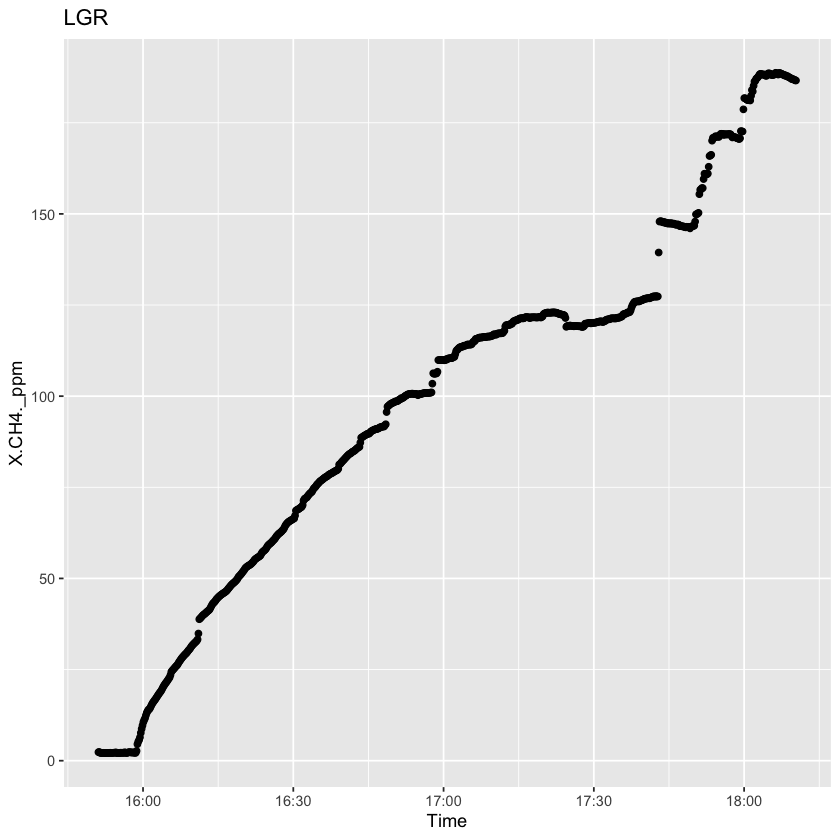

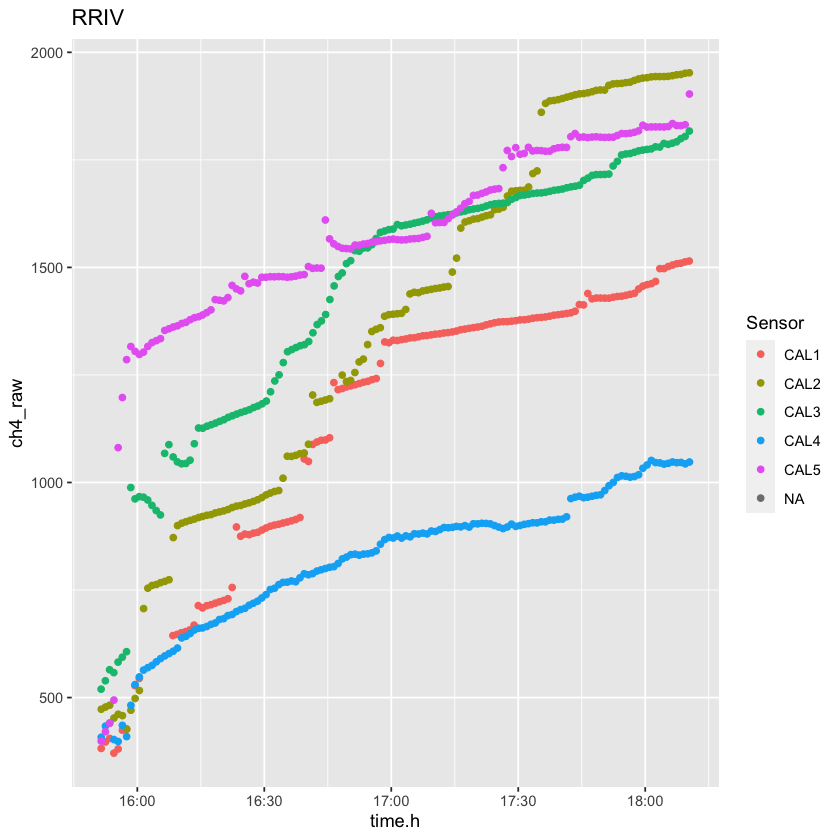

In [340]:
ggplot(lgr_data_overlap, aes(x=Time, y=X.CH4._ppm))+geom_point()+labs(title="LGR")
ggplot(rriv_data_ol_summary, aes(x=time.h, y=ch4_raw, color=Sensor))+geom_point()+labs(title="RRIV")